# Formula 1 laptime predictor

This project is an attempt to implement a LSTM neural network to predict Formula 1 laptimes based on previous laptime, circuit, driver ID and the current lap. This is essentially a prototype for a similar network I plan on building in the future which predicts laptimes based on data such as tyre wear, fuel levels etc from the F1 game UDP telemetry.

Dataset: http://ergast.com/mrd/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Creating the dataframe through joining tables

Final dataframe schema: (circuitID, driverID, currentLap, previousLaptime, actualLaptime)

1) Join laptimes and races on raceID, drop all rows where year does not equal 2019.

2) One hot encode driverId and circuitId

3) Add previous laptime

In [66]:
laptimes = pd.read_csv("dataset/lap_times.csv")
races = pd.read_csv("dataset/races.csv")

laptimes_join_races = laptimes.merge(races, on='raceId')
laptimes_join_races = laptimes_join_races[laptimes_join_races.year == 2019]
laptimes_2019 = laptimes_join_races.drop(["raceId", "year", "position", "name", "date", "time_x", "time_y", "url", "round"], axis=1)
laptimes_2019.reset_index()

,index,driverId,lap,milliseconds,circuitId
0,448879,822,1,93813,1
1,448880,822,2,89662,1
2,448881,822,3,89246,1
3,448882,822,4,88641,1
4,448883,822,5,88759,1
...,...,...,...,...,...
23620,472499,842,49,103719,24
23621,472500,842,50,102820,24
23622,472501,842,51,102814,24
23623,472502,842,52,105254,24


In [74]:

 laptimes_2019["lastLap"] = laptimes_2019["milliseconds"]

for index, row in laptimes_2019.iterrows():
    if row["lap"]==1:
        row["lastLap"]=None
    else:
        row["lastLap"] = laptimes_2019.loc[index-1]["milliseconds"]
        
laptimes_2019   

,driverId,lap,milliseconds,circuitId,lastLap
448879,822,1,93813,1,93813
448880,822,2,89662,1,93813
448881,822,3,89246,1,89662
448882,822,4,88641,1,89246
448883,822,5,88759,1,88641
...,...,...,...,...,...
472499,842,49,103719,24,105470
472500,842,50,102820,24,103719
472501,842,51,102814,24,102820
472502,842,52,105254,24,102814


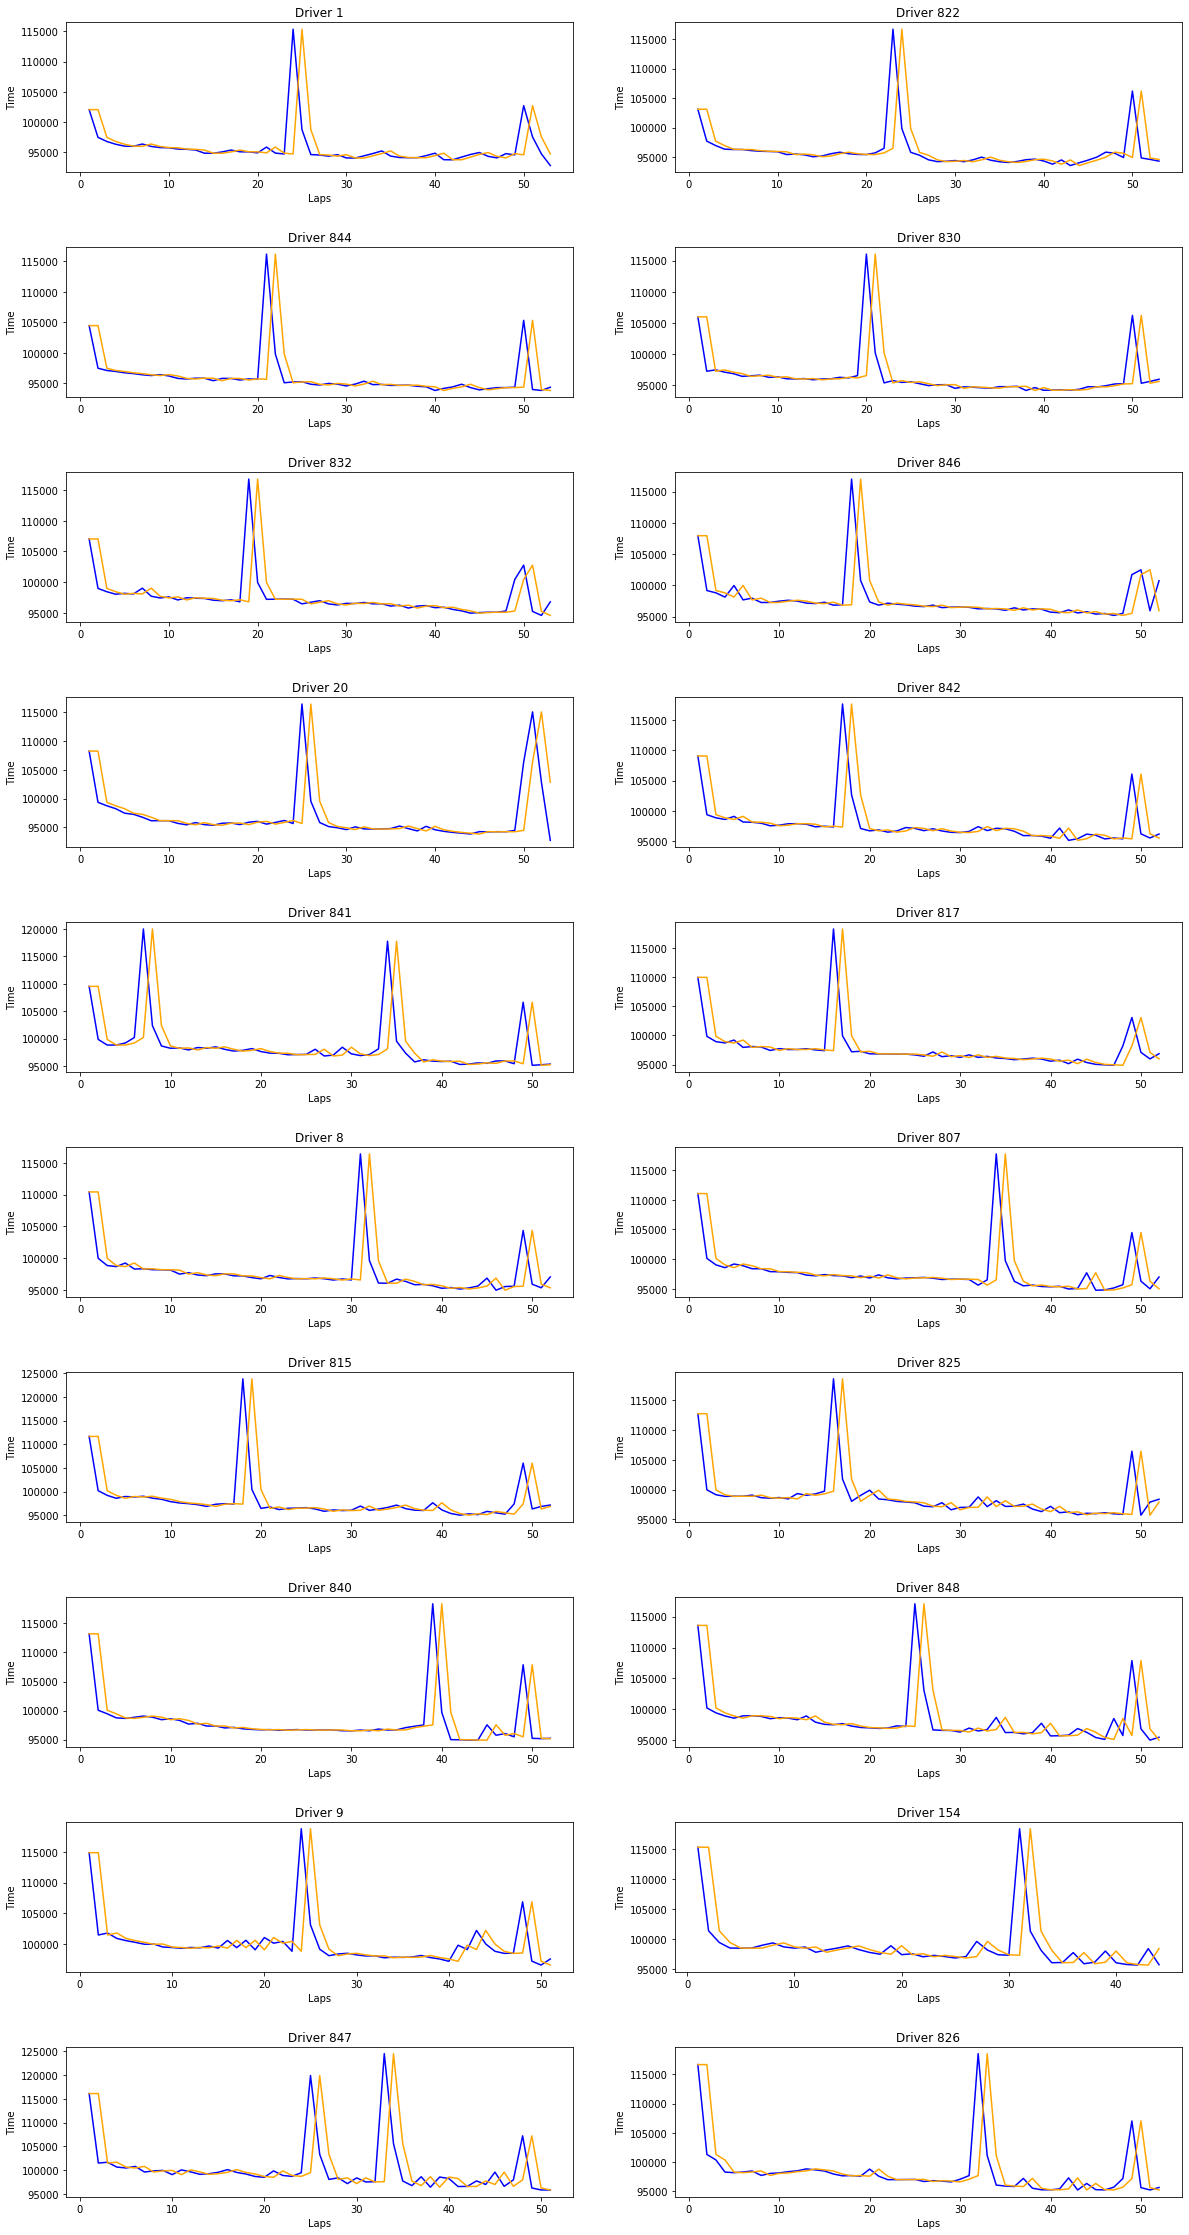

In [75]:
france_2019 = laptimes_2019.loc[laptimes_2019["circuitId"] == 34]
drivers = france_2019["driverId"].unique()
circuits = france_2019["circuitId"].unique()

fig, ax = plt.subplots(nrows = 10, ncols = 2, figsize=(20, 40))
ax = ax.flatten()
fig.subplots_adjust(hspace=0.5)

for i in range(0, drivers.size):
    driver_id = france_2019["driverId"].unique()[i]
    drivers_times = france_2019.loc[france_2019["driverId"]==driver_id]
    ax[i].plot(drivers_times["lap"], drivers_times["milliseconds"], color="blue")
    ax[i].plot(drivers_times["lap"], drivers_times["lastLap"], color="orange")
    ax[i].set_xlabel("Laps")
    ax[i].set_ylabel("Time")
    ax[i].set_title("Driver %d" % driver_id)
    